In [45]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# GOOSE Categories
category_mapping = {
    0: [33],  # Animal
    1: [43, 38, 58, 29, 41, 42, 44, 39, 55], # Construction
    2: [14, 32], # Human
    3: [4, 45, 6, 40, 60, 61], # Object
    4: [7, 22, 9, 26, 11, 21], # Road
    5: [48, 47, 1, 19, 46, 10, 25], # Sign
    6: [53], # Sky
    7: [23, 3, 24, 31, 2], # Terrain  
    8: [51, 50, 5, 18], # Drivable Vegetation
    9: [28, 27, 62, 52, 16, 30, 59, 17], # Non Drivable Vegetation
    10: [13, 15, 12, 36, 57, 49, 20, 35, 37, 34, 63], # Vehicle
    11: [8, 56, 0], # Void
    12: [54] # Water
}

In [88]:
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

semantic_to_category = {label: key for key, labels in category_mapping.items() for label in labels}

# Conjunto global para almacenar etiquetas no encontradas
unmapped_labels = set()

def categorize_labels_from_label_file(input_label, sample_size=4098):
    """ 
    Lee un archivo .label, extrae etiquetas semánticas y asigna categorías.
    Las etiquetas no encontradas en el diccionario se asignan a la categoría 11.
    """
    label = np.fromfile(input_label, dtype=np.uint32)
    sem_label = (label & 0xFFFF).astype(int)  # Extraer etiquetas semánticas

    if len(sem_label) > sample_size:
        indices = np.random.choice(len(sem_label), sample_size, replace=False)
        sem_label = sem_label[indices]

    # Identificar etiquetas únicas antes del mapeo
    unique_labels = np.unique(sem_label)

    # Guardar etiquetas no encontradas en el diccionario
    expected_labels = set(semantic_to_category.keys())
    missing_labels = set(unique_labels) - expected_labels

    if missing_labels:
        print(f"⚠️ Advertencia: Hay etiquetas no mapeadas en {input_label}: {missing_labels}")
        unmapped_labels.update(missing_labels)  # Guardarlas para luego escribirlas en un archivo

    # Mapear las etiquetas a categorías, asignando 11 si no están en el diccionario
    categories = np.array([semantic_to_category.get(lbl, 11) for lbl in sem_label])

    return sem_label, categories

def process_label_files(input_directory, sample_size=4098):
    """
    Procesa todos los archivos .label en el directorio y devuelve un generador
    que produce (semantic_labels, categories) de cada archivo.
    """
    label_files = [file for file in os.listdir(input_directory) if file.endswith(".label")]
    
    for file in tqdm(label_files, desc="Processing label files"):
        input_path = os.path.join(input_directory, file)
        yield categorize_labels_from_label_file(input_path, sample_size)

category_names = {
    0: "Animal",
    1: "Construction",
    2: "Human",
    3: "Object",
    4: "Road",
    5: "Sign",
    6: "Sky",
    7: "Terrain",
    8: "Drivable Vegetation",
    9: "Non Drivable Vegetation",
    10: "Vehicle",
    11: "Void",
    12: "Water"
}

def visualize_category_bar_chart(category_arrays):
    all_categories = np.concatenate(category_arrays)
    unique, counts = np.unique(all_categories, return_counts=True)
    percentages = counts / counts.sum() * 100
    category_labels = [category_names.get(cat, f"Category {cat}") for cat in unique]

    print(category_arrays)
    print(category_arrays[0])
    print(counts)

    plt.figure(figsize=(10, 5))
    plt.bar(category_labels, percentages)
    
    for i, perc in enumerate(percentages):
        plt.text(i, perc + 0.5, f"{perc:.1f}%", ha='center', fontsize=10)

    plt.xlabel("Categoría")
    plt.ylabel("Porcentaje (%)")
    plt.title("Distribución de Categorías en 'val' redimensionado a 5 puntos")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [89]:
# Directorio de prueba (reemplazar con la ruta real)
test_input_dir = r"/home/felix/Escritorio/TFG/datasets_bruto/Goose/goose_3d_val/labels/val"

# Procesa los archivos y almacena los resultados en arrays
category_arrays = []
for sem_labels, categories in process_label_files(test_input_dir, sample_size=1):
    category_arrays.append(categories)

Processing label files: 100%|██████████| 961/961 [00:03<00:00, 296.37it/s]


[array([9]), array([9]), array([1]), array([9]), array([8]), array([1]), array([1]), array([8]), array([8]), array([8]), array([8]), array([1]), array([7]), array([9]), array([9]), array([8]), array([9]), array([9]), array([9]), array([8]), array([9]), array([8]), array([9]), array([9]), array([9]), array([8]), array([9]), array([8]), array([9]), array([9]), array([9]), array([9]), array([11]), array([9]), array([9]), array([9]), array([9]), array([1]), array([1]), array([8]), array([9]), array([9]), array([9]), array([9]), array([8]), array([1]), array([9]), array([9]), array([9]), array([8]), array([9]), array([9]), array([1]), array([1]), array([7]), array([8]), array([7]), array([7]), array([1]), array([8]), array([9]), array([9]), array([8]), array([7]), array([8]), array([9]), array([9]), array([7]), array([9]), array([7]), array([8]), array([9]), array([1]), array([9]), array([7]), array([8]), array([9]), array([9]), array([7]), array([8]), array([9]), array([9]), array([1]), ar

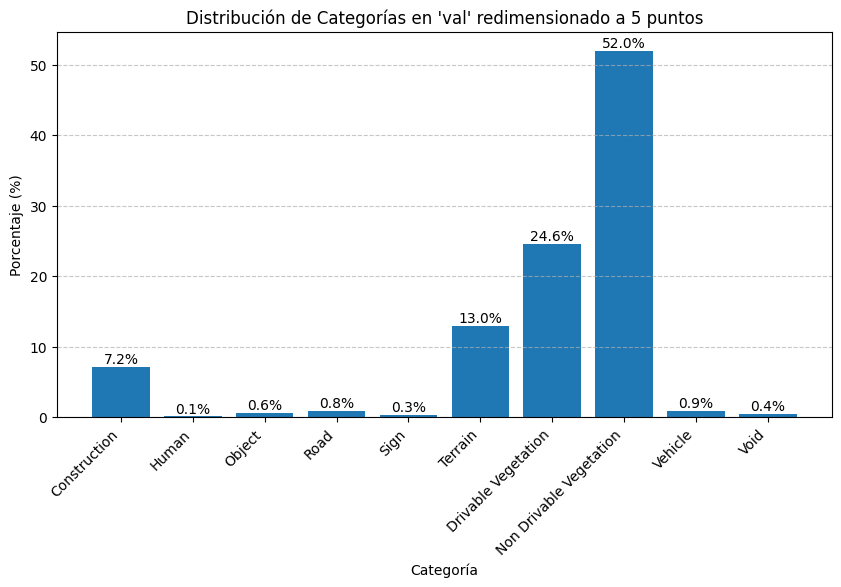

In [90]:
# Visualiza la distribución de categorías
visualize_category_bar_chart(category_arrays)